### Problem Statement
You are given bhp.csv which contains property prices in the city of banglore, India. 
You need to examine price_per_sqft column and do following,

1. Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles
2. After removing outliers in step 1, you get a new dataframe.
3. On step(2) dataframe, use 4 standard deviation to remove outliers
4. Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram
5. On step(2) dataframe, use zscore of 4 to remove outliers.
6. This is quite similar to step (3) and you will get exact same result

In [1]:
#importing the necessary packages
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\gjrah\Documents\Data Science\Data_Science\Statistics\Datasets\Normal_Distribution_&_Z_Score\bhp.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


- Right now, I am assuming **we don't need size,bath and bhk**
- I'm considering these are un-necessary columns or noise

In [7]:
df = df.drop(['size',
         'bath',
        'bhk'
        ], axis=1)

df.sample(3)

,location,total_sqft,price,price_per_sqft
2251,other,1020.0,37.0,3627
5351,Whitefield,1745.0,100.0,5730
9809,Electronic City,1360.0,70.0,5147


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   total_sqft      13200 non-null  float64
 2   price           13200 non-null  float64
 3   price_per_sqft  13200 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 412.6+ KB


##### I have the following data:
- 0.0001 for Minimum Quantile Range
- 0.999 for Maximum Quantile Range

In [10]:
#Lower Quantile Range
lower_quantile_range = df.price_per_sqft.quantile(0.001)
lower_quantile_range

1366.184

In [12]:
#Upper Quantile Range
upper_quantile_range = df.price_per_sqft.quantile(0.999)
upper_quantile_range

50959.36200000098

In [15]:
#Getting the data that are lower and higher than the lower quantile range and upper quantile range
outliners = df[(df.price_per_sqft < 1366.184) | (df.price_per_sqft > 50959.36200000098)]
print(outliners,"\n")
print(outliners.count())

                location  total_sqft   price  price_per_sqft
345                other        11.0    74.0          672727
665            Yelahanka     35000.0   130.0             371
798                other     10961.0    80.0             729
1005               other        15.0    30.0          200000
1106               other        24.0   150.0          625000
1867               other     52272.0   140.0             267
2392               other      2000.0    25.0            1250
3934               other      1500.0    19.5            1300
4044      Sarjapur  Road         1.0   120.0        12000000
4924               other         5.0   115.0         2300000
5343               other     42000.0   175.0             416
5417              Ulsoor     36000.0   450.0            1250
5597            JP Nagar      1100.0    15.0            1363
5911         Mysore Road        45.0    23.0           51111
6356        Bommenahalli      2940.0  2250.0           76530
7012               other

In [16]:
#Removing the outliners
df = df[(df.price_per_sqft > lower_quantile_range) & (df.price_per_sqft < upper_quantile_range) ]
df.head(6)

,location,total_sqft,price,price_per_sqft
0,Electronic City Phase II,1056.0,39.07,3699
1,Chikka Tirupathi,2600.0,120.00,4615
2,Uttarahalli,1440.0,62.00,4305
3,Lingadheeranahalli,1521.0,95.00,6245
4,Kothanur,1200.0,51.00,4250
5,Whitefield,1170.0,38.00,3247


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13172 entries, 0 to 13199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13172 non-null  object 
 1   total_sqft      13172 non-null  float64
 2   price           13172 non-null  float64
 3   price_per_sqft  13172 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 514.5+ KB


### Removing the outliner using the standard deviation

In [17]:
#Lowe Bound
lower_bound = (df.price_per_sqft.mean() - 4 * df.price_per_sqft.std())
lower_bound

-9900.429065502582

In [18]:
upper_bound = (df.price_per_sqft.mean() + 4 * df.price_per_sqft.std())
upper_bound

23227.73653589432

In [22]:
df = df[(df.price_per_sqft >= lower_bound) & (df.price_per_sqft <= upper_bound)]
df

,location,total_sqft,price,price_per_sqft
0,Electronic City Phase II,1056.0,39.07,3699
1,Chikka Tirupathi,2600.0,120.00,4615
2,Uttarahalli,1440.0,62.00,4305
3,Lingadheeranahalli,1521.0,95.00,6245
4,Kothanur,1200.0,51.00,4250
...,...,...,...,...
13195,Whitefield,3453.0,231.00,6689
13196,other,3600.0,400.00,11111
13197,Raja Rajeshwari Nagar,1141.0,60.00,5258
13198,Padmanabhanagar,4689.0,488.00,10407


In [23]:
# Calculating the difference
difference = 13172 - 13047
difference

125

### Results so far
- We have removed 125 more outliners

### Why the Results Vary:

#### Distribution Assumption:

**SD Method:** Assumes a normal distribution. If the data is skewed or has a non-normal distribution, the SD method may identify outliers differently compared to the quantile method.

**Quantile Method:** Does not assume any specific distribution. It is purely based on the percentile cutoffs.

#### Sensitivity to Extreme Values:

**SD Method:** Highly sensitive to extreme values. A few extreme outliers can significantly shift the mean and standard deviation.

**Quantile Method:** Less sensitive to extreme values. It focuses on the central percentage of the data, ignoring the extremities.

<Axes: xlabel='price_per_sqft', ylabel='Count'>

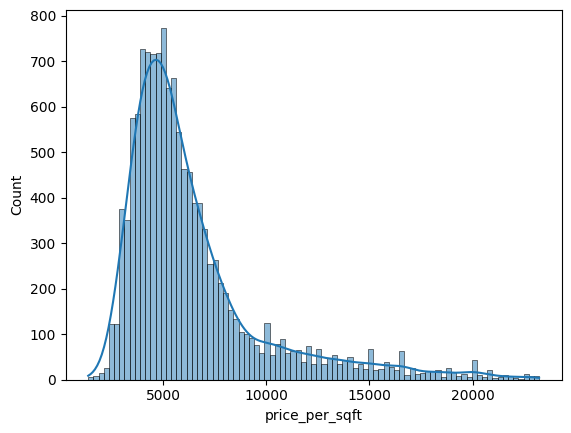

In [24]:
import seaborn as sn

sn.histplot(df.price_per_sqft,kde=True)

#### Removing Outliners Using Z-Score

In [27]:
df['zscore'] = (df.price_per_sqft - df.price_per_sqft.mean())/df.price_per_sqft.std()
df

,location,total_sqft,price,price_per_sqft,zscore
0,Electronic City Phase II,1056.0,39.07,3699,-0.788586
1,Chikka Tirupathi,2600.0,120.00,4615,-0.525947
2,Uttarahalli,1440.0,62.00,4305,-0.614831
3,Lingadheeranahalli,1521.0,95.00,6245,-0.058586
4,Kothanur,1200.0,51.00,4250,-0.630601
...,...,...,...,...,...
13195,Whitefield,3453.0,231.00,6689,0.068720
13196,other,3600.0,400.00,11111,1.336615
13197,Raja Rajeshwari Nagar,1141.0,60.00,5258,-0.341583
13198,Padmanabhanagar,4689.0,488.00,10407,1.134761


##### As per the problem statement, we need to remove the outliners of *Z-Score* of 4

In [29]:
df_filtered = df[df['zscore'].abs() < 4]
df_filtered

,location,total_sqft,price,price_per_sqft,zscore
0,Electronic City Phase II,1056.0,39.07,3699,-0.788586
1,Chikka Tirupathi,2600.0,120.00,4615,-0.525947
2,Uttarahalli,1440.0,62.00,4305,-0.614831
3,Lingadheeranahalli,1521.0,95.00,6245,-0.058586
4,Kothanur,1200.0,51.00,4250,-0.630601
...,...,...,...,...,...
13195,Whitefield,3453.0,231.00,6689,0.068720
13196,other,3600.0,400.00,11111,1.336615
13197,Raja Rajeshwari Nagar,1141.0,60.00,5258,-0.341583
13198,Padmanabhanagar,4689.0,488.00,10407,1.134761


- Now, we have **filtered out** the outliners futher

<Axes: xlabel='price_per_sqft', ylabel='Count'>

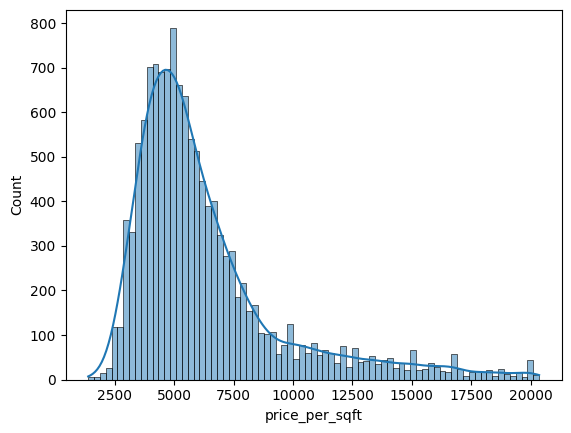

In [30]:
sn.histplot(df_filtered.price_per_sqft,kde=True)

### Results
- We can say **5500** is the mean and most of the layouts falls under 5500 per sqrt